In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quadprog
import Classifier
import kernels
import challengeFunctions as cf


## check that the SVM work correctly

### Create dataset

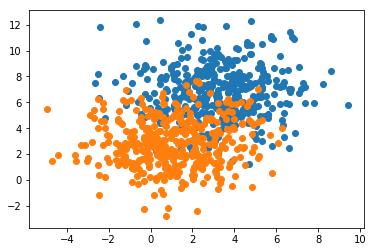

In [9]:
x1 = int(10*np.random.rand())
y1 = int(10*np.random.rand())
x2 = int(10*np.random.rand())
y2 = x1 = int(10*np.random.rand())
X11 = 2*np.random.randn(400) + x1
X12 = 2*np.random.randn(400) + y1

X21 = 2*np.random.randn(400) + x2
X22 = 2*np.random.randn(400) + y2
plt.figure()
plt.scatter(X11,X12)
plt.scatter(X21,X22)
plt.show()

In [10]:
X1 = np.vstack([X11, X12]).T# 100*np.ones(400)]).T
X2 = np.vstack([X21, X22]).T# 100*np.ones(400)]).T
Y =  np.hstack([np.ones(400), -np.ones(400)])
X = np.vstack([X1,X2])

### Define a display result fuction for different Kernels

In [11]:
def display_result(X,Y_true, svm):
    xmax = np.max(X[:,0])
    xmin = np.min(X[:,0])
    ymax = np.max(X[:,1])
    ymin = np.min(X[:,1])
    x = np.linspace(xmin, xmax, 10)
    y = np.linspace(ymin, ymax, 10)
    plt.figure()
    Xid, Y = np.meshgrid(x, y)
    Z = np.zeros((10,10))
    
    for kx in range(10):
        for ky in range(10) :
            
            Z[kx,ky] = svm.predict(np.array([[x[ky],y[kx]]]))
            
    plt.contourf(Xid, Y, Z, 20, cmap='RdGy')
    plt.colorbar()
    plt.contour(Xid, Y, Z, levels = [-1,0,1],  colors='black')
    
    X1 = X[Y_true == -1]
    X2 = X[Y_true == 1]
    plt.scatter(X1[:,0],X1[:,1], c='red')
    plt.scatter(X2[:,0],X2[:,1], c= 'black')
    plt.show()
            
        
    

     pcost       dcost       gap    pres   dres
 0: -1.5797e+02 -9.4231e+00  6e+03  8e+01  3e-15
 1: -1.6697e+01 -5.6578e+00  3e+02  4e+00  3e-15
 2: -3.2090e+00 -1.6434e+00  2e+01  3e-01  2e-15
 3: -4.1569e-01 -1.2175e+00  8e-01  2e-15  6e-15
 4: -4.5537e-01 -5.8966e-01  1e-01  2e-16  2e-15
 5: -4.9344e-01 -4.9740e-01  4e-03  8e-17  1e-15
 6: -4.9531e-01 -4.9535e-01  4e-05  2e-16  9e-16
 7: -4.9533e-01 -4.9533e-01  4e-07  4e-16  8e-16
Optimal solution found.
Number of non saturated constraints : 

800
score =  0.865


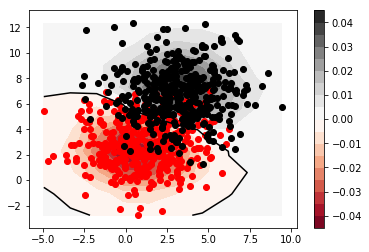

In [13]:
# learn classifier on the data

svm = Classifier.SVM("gaussian")
svm.lamb = 1
svm.train(X,Y)
Ytest = svm.predict(X)

# compute the score
pred = Ytest > 0
pred = 2*pred -1
score = np.sum(pred == Y)/800
print ('score = ', score)

#plot the decisison boundary
display_result(X, Y, svm)

## Test the Baseline

In [6]:
#first we try the baseline
def train_logreg(X,y):
    n = X.shape[0]
    p = X.shape[1]

    omega=np.zeros(p)

    while True:
        eta=1 / (1 + np.exp(np.clip(-X @ omega,-10,10)))

        D_eta=np.diag(eta*(1-eta))

        hessian = np.linalg.inv( X.T @ D_eta @ X )
        add = hessian @ X.T @ (y - eta)
        if np.sum(add >=1e-8) == 0:
            break
        omega = omega + add

    return omega

for i in range(1):
    Xf = np.genfromtxt('../data/Xtr{}_mat50.csv'.format(i))
    yf = np.genfromtxt('../data/Ytr{}.csv'.format(i),skip_header = 1,delimiter = ',')[:,1]
    omega = train_logreg(Xf,yf)

    y_pred = np.ones(Xf.shape[0])
    y_pred[Xf @ omega < 0] = 0
    print("Training accuracy : {}".format(cf.classification_accuracy(y_pred, yf))) 

Training accuracy : 0.644


In [7]:
X = cf.extractdata('../data/Xtr0_mat50.csv', sep = ' ')
Y = cf.extractdata('../data/Ytr0.csv')[1:,1]
Y = Y.astype(int)

In [8]:
Xtrain, Y_train, Xtest, Y_test = cf.splitdata(X,Y)
Xftrain, Yf_train, Xftest, Yf_test = cf.splitdata(Xf,yf)

In [9]:

omega = train_logreg(Xftrain,Yf_train)

y_pred = np.ones(Xftest.shape[0])
y_pred[Xftest @ omega < 0] = 0
print("Training accuracy : {}".format(cf.classification_accuracy(Yf_test, y_pred)))

Training accuracy : 0.566


## Test SVM on data MAT50

In [11]:
train_acc = []
test_acc = []
lambs = [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1,10,100,1000]
for lamb in lambs:
    svm = Classifier.SVM("linear")
    svm.lamb = lamb

    Y_train_svm = 2*(Y_train - 1/2)
    Y_test_svm = 2*(Y_test - 1/2)
    svm.train(Xtrain, Y_train_svm)
    y_pred = svm.predict(Xtrain)
    y_pred = y_pred > 0
    train_acc.append(cf.classification_accuracy(Y_train, y_pred))
    y_pred = svm.predict(Xtest)
    y_pred = y_pred > 0
    test_acc.append(cf.classification_accuracy(Y_test, y_pred))



     pcost       dcost       gap    pres   dres
 0:  5.8950e+09 -2.3728e+11  2e+11  9e-10  5e-11
 1:  1.1903e+09 -2.5629e+10  3e+10  9e-10  1e-11
 2:  1.5328e+07 -2.3019e+09  2e+09  1e-10  7e-12
 3: -2.2510e+07 -1.0553e+08  8e+07  1e-10  8e-12
 4: -2.9309e+07 -5.1960e+07  2e+07  2e-10  9e-12
 5: -3.3482e+07 -4.7513e+07  1e+07  7e-10  9e-12
 6: -3.6459e+07 -4.3689e+07  7e+06  7e-10  1e-11
 7: -3.7987e+07 -4.1861e+07  4e+06  3e-10  1e-11
 8: -3.8704e+07 -4.1029e+07  2e+06  1e-09  1e-11
 9: -3.9292e+07 -4.0333e+07  1e+06  5e-11  1e-11
10: -3.9528e+07 -4.0063e+07  5e+05  1e-09  1e-11
11: -3.9677e+07 -3.9890e+07  2e+05  2e-10  1e-11
12: -3.9736e+07 -3.9822e+07  9e+04  5e-10  1e-11
13: -3.9759e+07 -3.9797e+07  4e+04  2e-09  1e-11
14: -3.9771e+07 -3.9782e+07  1e+04  1e-09  1e-11
15: -3.9774e+07 -3.9779e+07  5e+03  6e-10  1e-11
16: -3.9776e+07 -3.9777e+07  1e+03  6e-10  1e-11
17: -3.9776e+07 -3.9777e+07  4e+02  8e-11  1e-11
18: -3.9777e+07 -3.9777e+07  9e+01  7e-10  1e-11
19: -3.9777e+07 -3.97

 2: -1.9864e-01 -1.0748e-03  2e+00  2e-02  2e-15
 3: -2.3314e-03 -1.0699e-03  2e-02  2e-04  2e-15
 4: -3.9559e-04 -1.0173e-03  6e-04  3e-20  2e-15
 5: -4.5982e-04 -5.3302e-04  7e-05  1e-20  2e-15
 6: -4.9034e-04 -5.0060e-04  1e-05  2e-21  1e-15
 7: -4.9056e-04 -4.9087e-04  3e-07  3e-21  8e-16
 8: -4.9067e-04 -4.9067e-04  3e-09  5e-21  1e-15
Optimal solution found.
Number of non saturated constraints : 

1500


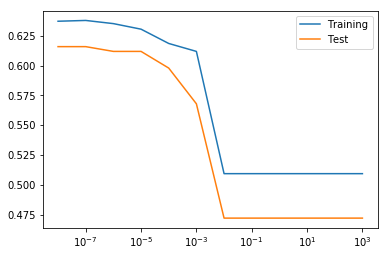

In [12]:
plt.semilogx(lambs,train_acc)
plt.semilogx(lambs,test_acc)
plt.legend(["Training",'Test'])
plt.show()

In [ ]:
plt.semilogx(lambs,train_acc)
plt.semilogx(lambs,test_acc)
plt.legend(["Training",'Test'])
plt.show()

In [ ]:
plt.semilogx(lambs,train_acc)
plt.semilogx(lambs,test_acc)
plt.legend(["Training",'Test'])
plt.show()

## Spectrum kernel

In [2]:
Xfile = "../data/Xtr0.csv"
Yfile = "../data/Ytr0.csv"
X,Y = cf.extract(Xfile,Yfile)
X_train, Y_train, X_test, Y_test = cf.splitdata(X,Y)

Ytr = 2*(Y_train - 1/2)
Yte = 2*(Y_test - 1/2)
svm = Classifier.SVM("spectrum")

In [3]:
svm.train(X_train,Ytr)

     pcost       dcost       gap    pres   dres
 0: -5.7522e+02 -1.4907e+00  1e+04  1e+02  3e-12
 1: -1.4011e+01 -1.4197e+00  3e+02  3e+00  2e-12
 2: -7.4193e-01 -1.2771e+00  9e+00  7e-02  9e-14
 3: -3.4301e-01 -1.0667e+00  7e-01  8e-18  3e-15
 4: -3.9526e-01 -5.1176e-01  1e-01  6e-18  2e-15
 5: -4.2489e-01 -4.6940e-01  4e-02  2e-18  1e-15
 6: -4.3539e-01 -4.5532e-01  2e-02  2e-18  1e-15
 7: -4.4121e-01 -4.4759e-01  6e-03  2e-18  1e-15
 8: -4.4355e-01 -4.4462e-01  1e-03  4e-18  1e-15
 9: -4.4394e-01 -4.4414e-01  2e-04  5e-18  1e-15
10: -4.4403e-01 -4.4404e-01  7e-06  5e-18  2e-15
11: -4.4404e-01 -4.4404e-01  1e-07  3e-18  2e-15
Optimal solution found.
Number of non saturated constraints : 

1475


In [6]:
#compute training accuracy
yp = svm.predict(X_train)
yp = yp >0
train_acc = np.sum(yp == Y_train)/(np.shape(yp)[0])
#compute test accuracy
yp = svm.predict(X_test)
yp = yp >0
test_acc = np.sum(yp == Y_test)/(np.shape(yp)[0])

print(train_acc,test_acc)

0.6966666666666667 0.648


     pcost       dcost       gap    pres   dres
 0:  2.4631e+08 -1.2030e+12  2e+12  5e-01  8e-08
 1:  1.5507e+08 -2.2815e+11  2e+11  9e-10  7e-08
 2: -1.9205e+07 -2.9170e+09  3e+09  3e-11  7e-08
 3: -1.9429e+07 -7.5774e+07  6e+07  6e-10  7e-08
 4: -2.5698e+07 -4.1408e+07  2e+07  2e-10  8e-08
 5: -2.9337e+07 -3.8345e+07  9e+06  9e-11  8e-08
 6: -3.0736e+07 -3.6795e+07  6e+06  2e-10  8e-08
 7: -3.2083e+07 -3.5126e+07  3e+06  4e-10  9e-08
 8: -3.2764e+07 -3.4261e+07  1e+06  3e-10  1e-07
 9: -3.3132e+07 -3.3788e+07  7e+05  9e-10  1e-07
10: -3.3287e+07 -3.3594e+07  3e+05  1e-09  9e-08
11: -3.3358e+07 -3.3506e+07  1e+05  1e-09  9e-08
12: -3.3395e+07 -3.3461e+07  7e+04  3e-10  9e-08
13: -3.3415e+07 -3.3436e+07  2e+04  1e-09  1e-07
14: -3.3419e+07 -3.3431e+07  1e+04  1e-09  1e-07
15: -3.3424e+07 -3.3425e+07  2e+03  8e-10  1e-07
16: -3.3424e+07 -3.3425e+07  3e+02  2e-10  1e-07
17: -3.3425e+07 -3.3425e+07  2e+01  2e-11  1e-07
18: -3.3425e+07 -3.3425e+07  4e+00  2e-10  1e-07
Optimal solution foun

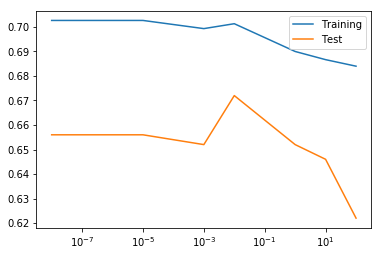

In [8]:
Xfile = "../data/Xtr0.csv"
Yfile = "../data/Ytr0.csv"
X,Y = cf.extract(Xfile,Yfile)
Xtrain, Y_train, Xtest, Y_test = cf.splitdata(X,Y)

train_acc = []
test_acc = []
lambs = [1e-8,1e-5,1e-3,1e-2,1,10,100]
for lamb in lambs:
    svm = Classifier.SVM("spectrum")
    svm.lamb = lamb

    Y_train_svm = 2*(Y_train - 1/2)
    Y_test_svm = 2*(Y_test - 1/2)
    svm.train(Xtrain, Y_train_svm)
    y_pred = svm.predict(Xtrain)
    y_pred = y_pred > 0
    train_acc.append(cf.classification_accuracy(Y_train, y_pred))
    y_pred = svm.predict(Xtest)
    y_pred = y_pred > 0
    test_acc.append(cf.classification_accuracy(Y_test, y_pred))
    
plt.semilogx(lambs,train_acc)
plt.semilogx(lambs,test_acc)
plt.legend(["Training",'Test'])
plt.show()